<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/codsoft_task_1_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Titanic dataset
tda = pd.read_csv('/content/tested.csv')

# Display the first few rows of the dataset
print(tda.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Display data types and non-null counts
tda.info()

# Check for missing values
print(tda.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Handle missing values in 'Embarked'
tda['Embarked'].fillna(0.0, inplace=True)

# Convert categorical variables to numerical
tda['Sex'] = tda['Sex'].map({'female': 0, 'male': 1})
tda['Embarked'] = tda['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
print(tda.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   418.000000  418.000000  418.000000  418.000000  332.000000   
mean   1100.500000    0.363636    2.265550    0.636364   30.272590   
std     120.810458    0.481622    0.841838    0.481622   14.181209   
min     892.000000    0.000000    1.000000    0.000000    0.170000   
25%     996.250000    0.000000    1.000000    0.000000   21.000000   
50%    1100.500000    0.000000    3.000000    1.000000   27.000000   
75%    1204.750000    1.000000    3.000000    1.000000   39.000000   
max    1309.000000    1.000000    3.000000    1.000000   76.000000   

            SibSp       Parch        Fare    Embarked  
count  418.000000  418.000000  417.000000  418.000000  
mean     0.447368    0.392344   35.627188    0.464115  
std      0.896760    0.981429   55.907576    0.685516  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800    0.000000  
50%      0.000000    0.000000   1

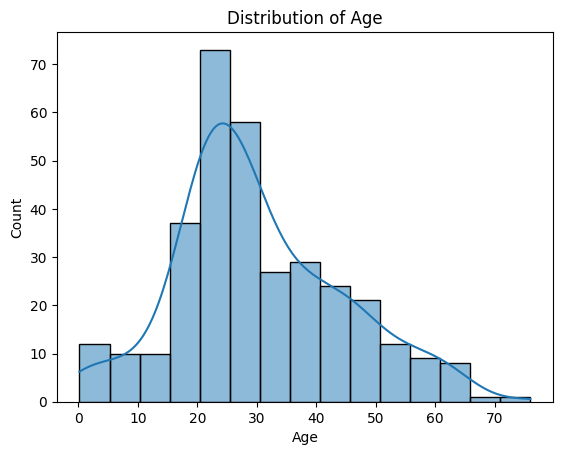

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of 'Age'
sns.histplot(tda['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

In [ ]:
tda.drop(['Name', 'Age', 'Fare', 'Cabin', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [ ]:
# Example: Create a 'FamilySize' feature
tda['FamilySize'] = tda['SibSp'] + tda['Parch'] + 1

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s e

In [ ]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models
# Set up the PyCaret classification environment
s = setup(data=tda, target='Survived')


,Description,Value
0,Session id,3027
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(418, 7)"
4,Transformed data shape,"(418, 7)"
5,Transformed train set shape,"(292, 7)"
6,Transformed test set shape,"(126, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Compare models
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5820
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0270
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0250
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0250
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3630
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0420
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0280
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0820
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1640
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Define independent variables (IDV) and the target variable (OUT)
IDV = tda.loc[:, ['PassengerId', 'Sex', 'SibSp', 'Parch', 'Embarked']]
OUT = tda['Survived']

In [ ]:
# Split the data into training and testing sets
IDV_train, IDV_test, OUT_train, OUT_test = train_test_split(IDV, OUT, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Logistic Regression model
Model = LogisticRegression()
Model.fit(IDV_train, OUT_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions on the training set
PRED = Model.predict(IDV_train)
ACC1 = accuracy_score(PRED, OUT_train)
print('ACCURACY on training data >', ACC1)

ACCURACY on training data > 1.0


In [ ]:

# Make predictions on the testing set
PREDTEST = Model.predict(IDV_test)
ACCTD = accuracy_score(PREDTEST, OUT_test)
print('ACCURACY on test split data >', ACCTD)

ACCURACY on test split data > 1.0


In [ ]:
# Load the test dataset
TestD = pd.read_csv('/content/tested.csv')

In [ ]:
# Data preprocessing for the test dataset
TestD['Sex'] = TestD['Sex'].map({'female': 0, 'male': 1})
TestD['Embarked'] = TestD['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
TestD.drop(['Name', 'Age', 'Fare', 'Cabin', 'Ticket', 'Pclass'], axis=1, inplace=True)


In [ ]:
# Make predictions on the test dataset
predictions = Model.predict(TestD[['PassengerId', 'Sex', 'SibSp', 'Parch', 'Embarked']])
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
